In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/zameen-dec2020-clean.csv')

/Users/abdur_rehman/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(4523278, 38)

In [4]:
df.head(1)

,Property ID,Purpose,Type,Title,Subtitle,Location,Area,Price,Beds,Baths,...,Locality,City,Area_marlas,Price_rupees,Age,Freshness_days,Prob_Fresh,Price_rupees_crores,Price_rupees_lakhs,Price_per_marla
0,26526717,For Sale,Flat,Beautiful Apartment Is Available For Sale In R...,"Bahria Heights, Bahria Town Karachi, Karachi, ...","Bahria Town Karachi, Karachi, Sindh",4.9 Marla,52 Lakh,2.0,2.0,...,Bahria Town Karachi,Karachi,4.9,5200000,NaN,0,0.1,0.52,52.0,10.612245


In [5]:
df.dtypes

Property ID                int64
Purpose                   object
Type                      object
Title                     object
Subtitle                  object
Location                  object
Area                      object
Price                     object
Beds                     float64
Baths                    float64
Year of Construction      object
Servant Quarters         float64
Parking Spaces           float64
Double Glazed Windows     object
Central AC                object
Park                      object
Jacuzzi                   object
Agency                    object
Agent                     object
Titanium Agency?            bool
Agency Video                bool
Number of Images           int64
Tour Video                  bool
Property Verified           bool
Date Scraped              object
URL                       object
Added                     object
Date Last Updated         object
Locality                  object
City                      object
Area_marla

<AxesSubplot:>

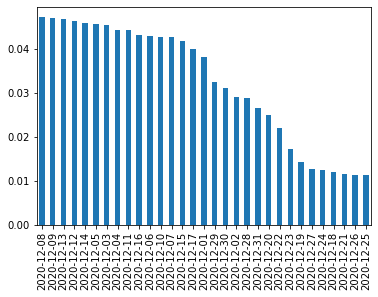

In [6]:
df['Date Scraped'] = pd.to_datetime(df['Date Scraped'])

df['Date Scraped'] = df['Date Scraped'].dt.date

df['Date Scraped'].value_counts(normalize=True).plot(kind='bar')

In [7]:
# df['Property ID'] = df['Property ID'].apply(lambda x: x[-8:])

In [8]:
# df['Property ID'].apply(len).value_counts(normalize=True)

In [9]:
# plots have fewer digits
# df['Property ID'] = np.where(df['Property ID'].str.contains('[a-z]{1}'), df['Property ID'].apply(lambda x: x[2:]), df['Property ID'])

In [10]:
# df['Property ID'] = df['Property ID'].astype(int)

In [11]:
pd.set_option('min_rows', 100)
pd.set_option('display.max_columns', 100)

In [12]:
df.head(2)

,Property ID,Purpose,Type,Title,Subtitle,Location,Area,Price,Beds,Baths,Year of Construction,Servant Quarters,Parking Spaces,Double Glazed Windows,Central AC,Park,Jacuzzi,Agency,Agent,Titanium Agency?,Agency Video,Number of Images,Tour Video,Property Verified,Date Scraped,URL,Added,Date Last Updated,Locality,City,Area_marlas,Price_rupees,Age,Freshness_days,Prob_Fresh,Price_rupees_crores,Price_rupees_lakhs,Price_per_marla
0,26526717,For Sale,Flat,Beautiful Apartment Is Available For Sale In R...,"Bahria Heights, Bahria Town Karachi, Karachi, ...","Bahria Town Karachi, Karachi, Sindh",4.9 Marla,52 Lakh,2.0,2.0,NaN,NaN,NaN,No,No,No,No,Salaam Estate & Builders,Rana Arsalan,True,True,10,False,False,2020-12-01,https://www.zameen.com/Property/bahria_town_ka...,28 minutes,2020-12-01,Bahria Town Karachi,Karachi,4.9,5200000,NaN,0,0.1,0.52,52.0,10.612245
1,26481937,For Sale,House,3 Beds Villa For Sale In Bahria Town Karachi,"Bahria Town - Precinct 31, Bahria Town Karachi...","Bahria Town Karachi, Karachi, Sindh",8 Marla,86 Lakh,3.0,3.0,NaN,NaN,NaN,No,No,No,No,Sub Ki Property,SUB KI PROPERTY,True,False,11,False,False,2020-12-01,https://www.zameen.com/Property/bahria_town_ka...,20 minutes,2020-12-01,Bahria Town Karachi,Karachi,8.0,8600000,NaN,0,0.4,0.86,86.0,10.750000


In [14]:
df['Age'].astype(float).value_counts(normalize=True)[:10]

0.0     0.455353
1.0     0.148506
2.0     0.097228
3.0     0.046508
5.0     0.044543
10.0    0.041784
Name: Age, dtype: float64

### EDA

In [15]:
dff = df[['Property ID', 'Purpose', 'Type', 'Locality', 'City', 'Area_marlas', 'Price_rupees_crores', 
         'Price_rupees_lakhs', 'Price_per_marla', 'Beds', 'Baths', 'Age', 'Agency', 'Agent', 'Number of Images',
          'Date Scraped', 'Added', 'Date Last Updated', 'Property Verified', 'URL']].copy()

In [16]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4523278 entries, 0 to 4523277
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Property ID          int64  
 1   Purpose              object 
 2   Type                 object 
 3   Locality             object 
 4   City                 object 
 5   Area_marlas          float64
 6   Price_rupees_crores  float64
 7   Price_rupees_lakhs   float64
 8   Price_per_marla      float64
 9   Beds                 float64
 10  Baths                float64
 11  Age                  float64
 12  Agency               object 
 13  Agent                object 
 14  Number of Images     int64  
 15  Date Scraped         object 
 16  Added                object 
 17  Date Last Updated    object 
 18  Property Verified    bool   
 19  URL                  object 
dtypes: bool(1), float64(7), int64(2), object(10)
memory usage: 660.0+ MB


In [17]:
dff['Date Scraped'] = pd.to_datetime(dff['Date Scraped'])

In [18]:
dff['Date Last Updated'] = pd.to_datetime(dff['Date Last Updated'])

In [19]:
dff.describe()

,Property ID,Area_marlas,Price_rupees_crores,Price_rupees_lakhs,Price_per_marla,Beds,Baths,Age,Number of Images
count,4.523278e+06,4.523278e+06,4.523278e+06,4.523278e+06,4.523278e+06,2.324716e+06,2.272726e+06,606264.000000,4.523278e+06
mean,2.542072e+07,2.797946e+02,2.504099e+00,2.504099e+02,inf,3.665915e+00,3.933290e+00,3.083922,8.385328e+00
std,2.198952e+06,4.491658e+04,2.174401e+01,2.174401e+03,NaN,1.615867e+00,1.797968e+00,5.643981,1.166018e+01
min,2.557650e+05,0.000000e+00,1.000000e-07,1.000000e-05,2.619345e-11,1.000000e+00,1.000000e+00,0.000000,0.000000e+00
25%,2.512672e+07,5.000000e+00,1.975000e-01,1.975000e+01,2.600000e+00,3.000000e+00,3.000000e+00,0.000000,0.000000e+00
50%,2.618912e+07,1.000000e+01,8.000000e-01,8.000000e+01,9.500000e+00,3.000000e+00,4.000000e+00,1.000000,3.000000e+00
75%,2.658332e+07,2.000000e+01,2.000000e+00,2.000000e+02,2.125000e+01,5.000000e+00,5.000000e+00,4.000000,1.300000e+01
max,2.718244e+07,9.544372e+06,4.668000e+03,4.668000e+05,inf,2.700000e+01,2.100000e+01,111.000000,1.000000e+02


In [20]:
dff['Purpose'].value_counts(normalize=True)

For Sale    0.786144
For Rent    0.213856
Name: Purpose, dtype: float64

In [21]:
sale = dff[dff['Purpose'] == 'For Sale'].copy()

In [22]:
sale.drop(columns=['Purpose'], inplace=True)

In [23]:
sale.reset_index(drop=True, inplace=True)

### Scrapes

In [24]:
scrapes = sale.groupby(['Property ID'])['Date Scraped'].count().rename('Number of Scrapes').reset_index()

In [25]:
scrapes = scrapes.sort_values(by='Number of Scrapes', ascending=False)

In [26]:
sale = sale.merge(scrapes, on='Property ID')

In [27]:
sale.head()

,Property ID,Type,Locality,City,Area_marlas,Price_rupees_crores,Price_rupees_lakhs,Price_per_marla,Beds,Baths,Age,Agency,Agent,Number of Images,Date Scraped,Added,Date Last Updated,Property Verified,URL,Number of Scrapes
0,26526717,Flat,Bahria Town Karachi,Karachi,4.9,0.52,52.0,10.612245,2.0,2.0,NaN,Salaam Estate & Builders,Rana Arsalan,10,2020-12-01,28 minutes,2020-12-01,False,https://www.zameen.com/Property/bahria_town_ka...,1
1,26481937,House,Bahria Town Karachi,Karachi,8.0,0.86,86.0,10.750000,3.0,3.0,NaN,Sub Ki Property,SUB KI PROPERTY,11,2020-12-01,20 minutes,2020-12-01,False,https://www.zameen.com/Property/bahria_town_ka...,4
2,26481937,House,Bahria Town Karachi,Karachi,8.0,0.86,86.0,10.750000,3.0,3.0,NaN,Sub Ki Property,SUB KI PROPERTY,11,2020-12-02,3 hours,2020-12-02,False,https://www.zameen.com/Property/bahria_town_ka...,4
3,26481937,House,Bahria Town Karachi,Karachi,8.0,0.86,86.0,10.750000,3.0,3.0,NaN,Sub Ki Property,SUB KI PROPERTY,11,2020-12-03,20 hours,2020-12-03,False,https://www.zameen.com/Property/bahria_town_ka...,4
4,26481937,House,Bahria Town Karachi,Karachi,8.0,0.86,86.0,10.750000,3.0,3.0,NaN,Sub Ki Property,SUB KI PROPERTY,14,2020-12-04,16 hours,2020-12-04,False,https://www.zameen.com/Property/bahria_town_ka...,4


<AxesSubplot:>

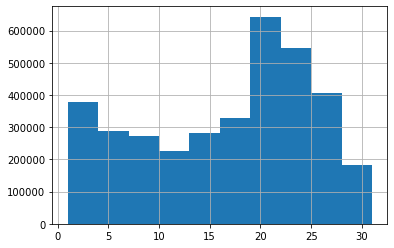

In [28]:
sale['Number of Scrapes'].hist()

#### Filter to listings scraped for at least for 2 weeks

In [29]:
most_scraped = sale[sale['Number of Scrapes'] > 15].copy()

In [30]:
scraped_prices = most_scraped.groupby(['Property ID', 'Date Scraped'])['Price_rupees_crores'].sum().reset_index()

In [31]:
scraped_prices[:10]

,Property ID,Date Scraped,Price_rupees_crores
0,311973,2020-12-01,0.6
1,311973,2020-12-04,0.6
2,311973,2020-12-06,0.6
3,311973,2020-12-08,0.6
4,311973,2020-12-09,0.6
5,311973,2020-12-10,0.6
6,311973,2020-12-11,0.6
7,311973,2020-12-12,0.6
8,311973,2020-12-15,0.6
9,311973,2020-12-16,0.6


In [32]:
scraped_prices.shape

(2108253, 3)

In [116]:
top1000 = scraped_prices['Property ID'].unique()[:1000]

In [117]:
top_scraped_prices = scraped_prices[scraped_prices['Property ID'].isin(top1000)].copy()

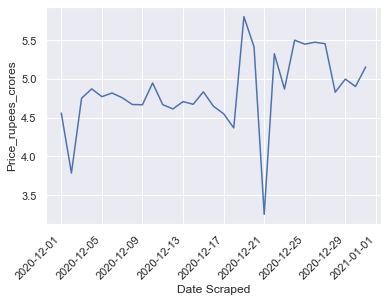

In [118]:
# plt.figure(figsize=(8,6))
sns.lineplot(x='Date Scraped', y='Price_rupees_crores', data=top_scraped_prices, ci=None)
plt.xticks(rotation=45, ha='right')
plt.show()

In [154]:
pivot_scraped_prices = scraped_prices.pivot(index='Date Scraped', columns='Property ID', values='Price_rupees_crores')



In [155]:
mean_pchange = pivot_scraped_prices.pct_change().reset_index().mean()

/Users/abdur_rehman/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [156]:
mean_pchange = mean_pchange.rename('pchange').reset_index().sort_values('pchange', ascending=False)

In [157]:
pd.set_option('display.max_rows', 1000)

In [160]:
mean_pchange.shape

(97207, 2)

In [163]:
3175/97207 * 100, 1969/97207 * 100

(3.2662256833355623, 2.0255742899173925)

In [158]:
mean_pchange[mean_pchange['pchange'] > 0].shape

(3175, 2)

In [159]:
mean_pchange[mean_pchange['pchange'] < 0].shape

(1969, 2)

#### Isolate Area

<AxesSubplot:>

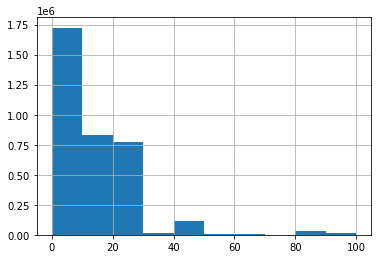

In [35]:
sale['Area_marlas'].round(0).hist(range=(0,100))

In [36]:
most_scraped['Area_group'] = pd.cut(most_scraped['Area_marlas'],bins=[0,5,10,15,20,30,40,120], 
                                    include_lowest=True, 
                                    labels=['0-5', '5-10', '10-15', '15-20', '20-30', '30-40', '40-120'])

In [37]:
scraped_prices_marlas = most_scraped.groupby(['Date Scraped', 'Area_group'])['Price_rupees_crores'].mean().reset_index()

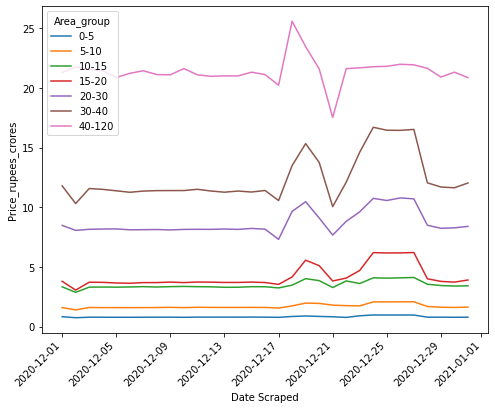

In [38]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Date Scraped', y='Price_rupees_crores', hue='Area_group', data=scraped_prices_marlas)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Isolate City

In [39]:
scraped_prices_city = most_scraped.groupby(['Date Scraped', 'City'])['Price_rupees_crores'].mean().reset_index()

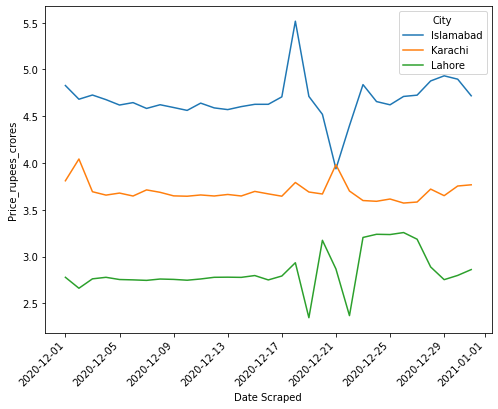

In [40]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Date Scraped', y='Price_rupees_crores', hue='City', data=scraped_prices_city)
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
# Islamabad appears to be driving the spike

In [42]:
islo = most_scraped[most_scraped['City'] == 'Islamabad'].copy()

In [43]:
scraped_prices_type = islo.groupby(['Date Scraped', 'Type'])['Price_rupees_crores'].mean().reset_index()

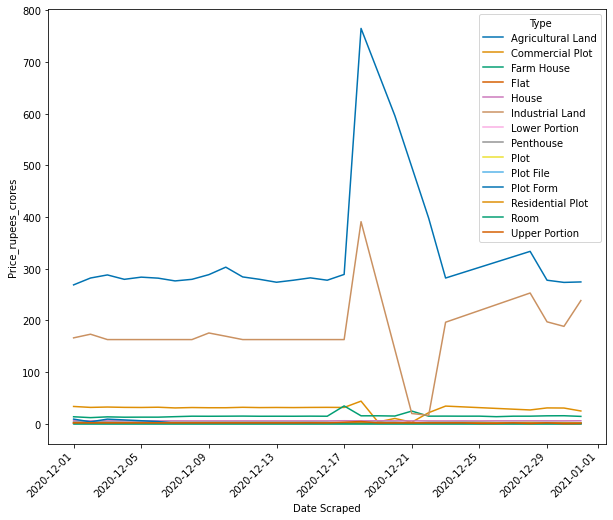

In [44]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Date Scraped', y='Price_rupees_crores', hue='Type', data=scraped_prices_type,
            palette='colorblind')
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
islo['Type'].value_counts()

Residential Plot     340515
House                218199
Flat                  85871
Commercial Plot       24519
Plot File             12198
Farm House             4874
Agricultural Land      1265
Penthouse               764
Industrial Land         546
Upper Portion           240
Plot                    113
Lower Portion            78
Plot Form                42
Room                     28
Name: Type, dtype: int64

In [46]:
# ASSUMPTION: these are residential plots
islo[islo['Type'].str.contains('^Plot$|Plot Form|Plot File')]['Price_per_marla'].round(0).value_counts()

1.0     4436
2.0     2935
0.0     1014
3.0     1000
4.0      832
9.0      637
5.0      272
10.0     271
6.0      268
7.0      246
8.0      145
12.0      67
11.0      64
17.0      62
14.0      44
16.0      37
13.0      22
26.0       1
Name: Price_per_marla, dtype: int64

In [47]:
islo['Type'] = np.where(islo['Type'].str.contains('^Plot$|Plot Form|Plot File'),'Residential Plot', islo['Type'])

In [48]:
# remove listings with 0 marlas
islo = islo[islo['Price_per_marla'] != np.inf].copy()

In [49]:
# diff between commercial and residential plots looks ok
islo.groupby('Type')['Price_per_marla'].mean()

Type
Agricultural Land     1.954659
Commercial Plot      65.063117
Farm House            6.816116
Flat                 20.256709
House                32.336205
Industrial Land      28.813389
Lower Portion        32.035256
Penthouse            24.658442
Residential Plot      8.879012
Room                 25.000000
Upper Portion        13.861161
Name: Price_per_marla, dtype: float64

In [50]:
pivot = scraped_prices_type.pivot(index='Date Scraped', columns='Type', values='Price_rupees_crores')

In [51]:
pivot_pc = pivot.pct_change()

<AxesSubplot:xlabel='Date Scraped'>

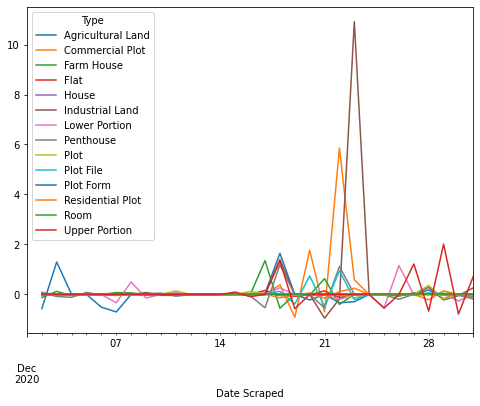

In [52]:
pivot_pc.plot(figsize=(8,6))

### Find duplicate listings to account for strategic behavior by realtors

In [53]:
# Lahore has the most listings
sale['City'].value_counts(normalize=True)

Lahore       0.388873
Karachi      0.314331
Islamabad    0.296796
Name: City, dtype: float64

In [54]:
lahore = sale[sale['City'] == 'Lahore'].copy()

In [55]:
# filter to scrapes for one day
lahore = lahore[lahore['Date Scraped'].astype(str) == '2020-12-08'].copy()

In [56]:
lahore.shape

(71172, 20)

In [58]:
lahore = lahore[lahore['Type'].str.contains('^House$|^Flat$')].copy()

In [59]:
lahore['Type'].value_counts(normalize=True)

House    0.92734
Flat     0.07266
Name: Type, dtype: float64

In [60]:
pd.set_option('max_colwidth', 200)

In [173]:
# de-duplication
# same images?
# same text?
# same specs + price?
# same specs + agent/agency?

In [61]:
len(lahore)

22282

In [62]:
len(lahore[lahore[['Type', 'Locality', 'Area_marlas', 'Beds', 'Baths', 'Price_rupees_crores']].duplicated(keep='first')])

11326

In [63]:
# len(lahore[lahore[['Type', 'Locality', 'Area_marlas', 'Beds', 'Baths', 'Agency', 'Agent']].duplicated(keep='first')])

In [68]:
# obvious cases
# same specs
# len(lahore[lahore[['Type', 'Locality', 'Area_marlas', 'Beds', 'Baths', 'Price_rupees_crores']].duplicated(keep='first')].sort_values(by=['Type', 'Locality', 'Area_marlas', 'Price_rupees_crores']))



In [69]:
lahore = lahore[~lahore[['Type', 'Locality', 'Area_marlas', 'Beds', 'Baths', 'Price_rupees_crores']].duplicated(keep='first')].copy()



In [70]:
lahore.shape

(10956, 20)

<AxesSubplot:>

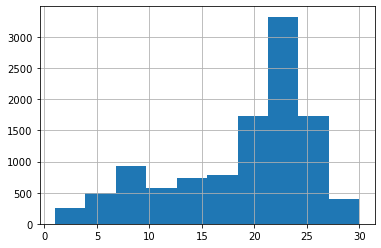

In [71]:
lahore['Number of Scrapes'].hist()

### Mean price for listings scraped daily over Dec 2020

In [72]:
daily_scp = sale[sale['Number of Scrapes'] == 31].copy()

In [73]:
# 15K properties
daily_scp.shape

(15097, 20)

In [74]:
daily_scp['Type'].value_counts(normalize=True)

House            0.618070
Flat             0.363450
Farm House       0.012320
Lower Portion    0.002053
Penthouse        0.002053
Upper Portion    0.002053
Name: Type, dtype: float64

In [75]:
daily_scp['City'].value_counts(normalize=True)

Islamabad    0.716632
Karachi      0.283368
Name: City, dtype: float64

In [76]:
mean_pr = daily_scp.groupby(['Property ID', 'Area_marlas', 'City', 'Date Scraped'])['Price_rupees_crores'].mean().rename('Mean Price').reset_index()


In [77]:
mean_pr.head()

,Property ID,Area_marlas,City,Date Scraped,Mean Price
0,3626467,50.0,Islamabad,2020-12-01,26.5
1,3626467,50.0,Islamabad,2020-12-02,26.5
2,3626467,50.0,Islamabad,2020-12-03,26.5
3,3626467,50.0,Islamabad,2020-12-04,26.5
4,3626467,50.0,Islamabad,2020-12-05,26.5


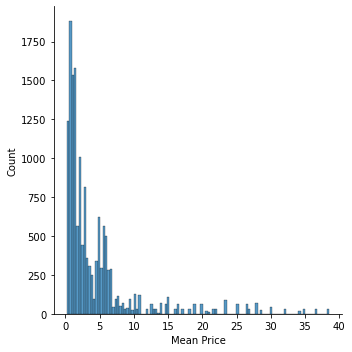

In [78]:
sns.displot(x='Mean Price', data=mean_pr)

<AxesSubplot:>

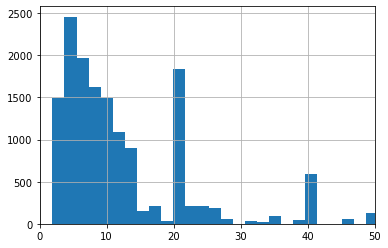

In [79]:
plt.xlim([0,50])
mean_pr['Area_marlas'].hist(bins=100)

In [80]:
# 0-5, 5-9, 9-14, 14-18, 18-21, 21-30, 30-40, 40-41

In [84]:
sale['Area_group'] = pd.cut(sale['Area_marlas'],bins=[0,5,10,15,20,30,40,120], include_lowest=True, 
                            labels=['0-5', '5-10', '10-15', '15-20', '20-30', '30-40', '40-120'])

In [86]:
# group marlas
sale['Area_group'].value_counts()

5-10      1120268
0-5       1112967
15-20      776440
10-15      242834
30-40      122117
20-30       78465
40-120      69567
Name: Area_group, dtype: int64

In [87]:
mean_pr_ = mean_pr[mean_pr['Area_marlas'].isin([5,10,20,40])].copy()

In [89]:
mean_pr_m = mean_pr_.groupby(['Date Scraped', 'Area_marlas'])['Mean Price'].mean().reset_index()

In [91]:
mean_pr_m['5m%change'] = mean_pr_m[mean_pr_m['Area_marlas'] == 5]['Mean Price'].pct_change()*100
mean_pr_m['10m%change'] = mean_pr_m[mean_pr_m['Area_marlas'] == 10]['Mean Price'].pct_change()*100
mean_pr_m['20m%change'] = mean_pr_m[mean_pr_m['Area_marlas'] == 20]['Mean Price'].pct_change()*100
mean_pr_m['40m%change'] = mean_pr_m[mean_pr_m['Area_marlas'] == 40]['Mean Price'].pct_change()*100

In [92]:
sns.set()

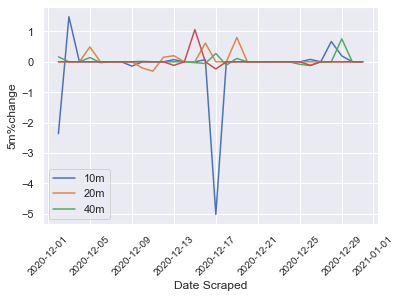

In [185]:
# ax = plt.gca()
# ax.set_ylim([-5,2])

sns.lineplot(x='Date Scraped', y='5m%change', data=mean_pr_m)
sns.lineplot(x='Date Scraped', y='10m%change', data=mean_pr_m)
sns.lineplot(x='Date Scraped', y='20m%change', data=mean_pr_m)
sns.lineplot(x='Date Scraped', y='40m%change', data=mean_pr_m)

plt.legend(['10m', '20m', '40m'])
plt.xticks(rotation=45, size=10)
plt.show()